In [60]:
import pandas as pd

# write simple query
query = "https://data.cityofnewyork.us/resource/ic3t-wcy2.json?"\
"$select=job__,pre__filing_date,borough"\
"&$limit=1000000"

# read in 1 mm rows
d = pd.read_json(query)

In [61]:
# tranform date
d['date'] = pd.to_datetime(d['pre__filing_date'])
d = d.drop_duplicates()

# group by dates, count values
df = d['date'].dt.date.value_counts().sort_index().reset_index()

# rename columns
df.columns = ['date', 'counts']


In [63]:
# convert object to date
df["date"] = pd.to_datetime(df["date"])


date_filter = df["date"] > '2016-01-01'

df = df[date_filter]

Text(0.5, 1.0, 'NYC Job Applications')

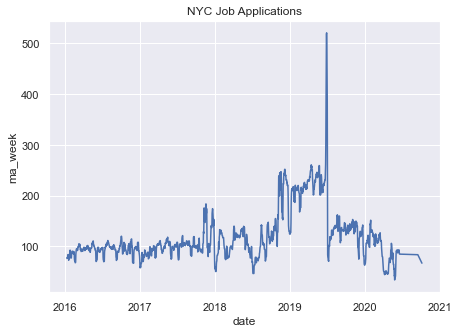

In [64]:
import seaborn as sns

sns.set(rc={'figure.figsize':(7,5)})

# create 7 day ma
df['ma_week'] = df.iloc[:,1].rolling(7).mean()

# make ts plot
sns.lineplot(data = df, x = "date", y = "ma_week")\
.set_title("NYC Job Applications")



In [65]:
from fbprophet import Prophet

In [70]:
df = df.drop(columns='ma_week')

In [71]:
df.columns = ['ds', 'y']

In [72]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1972,2021-10-03
1973,2021-10-04
1974,2021-10-05
1975,2021-10-06
1976,2021-10-07


In [74]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1972,2021-10-03,-276.303127,-363.205271,-189.162626
1973,2021-10-04,-140.803674,-217.373132,-61.000534
1974,2021-10-05,-118.577995,-203.382551,-28.556531
1975,2021-10-06,-111.321718,-193.363252,-21.881791
1976,2021-10-07,-114.030562,-205.081000,-30.003892


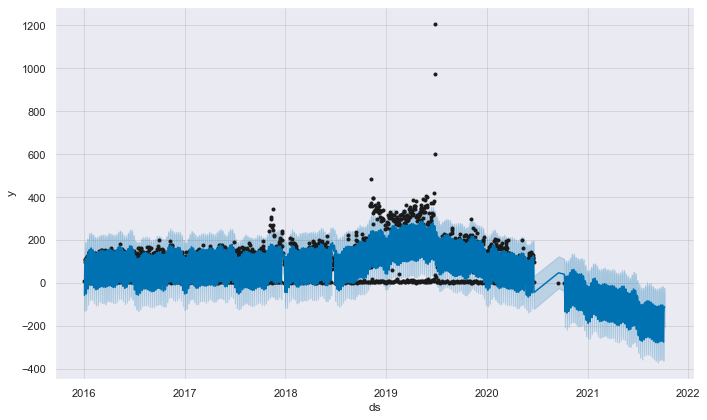

In [75]:
# Python
fig1 = m.plot(forecast)

In [78]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)


In [79]:
# Python
plot_components_plotly(m, forecast)

# Next Steps
- learn about [mansion tax](https://ny.curbed.com/2019/7/1/20677076/mansion-tax-q2-sales-manhattan-2019)
- clean code